<a href="https://colab.research.google.com/github/baileymccluresinger/PUS2024_BSinger/blob/main/geopandas_classdemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install geopandas
!pip install python3-rtree

ERROR: Could not find a version that satisfies the requirement python3-rtree (from versions: none)
ERROR: No matching distribution found for python3-rtree


In [43]:
#shapely
#fiona
#majority is .shp, shape file,

import geopandas as gpd
gpd.datasets.available

[]

In [44]:
url = "https://github.com/nvkelso/natural-earth-vector/raw/refs/heads/master/110m_cultural/ne_110m_admin_0_countries.shp"

In [45]:
world = gpd.read_file(url)

In [46]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [47]:
world.iloc[0]

,0
featurecla,Admin-0 country
scalerank,1
LABELRANK,6
SOVEREIGNT,Fiji
SOV_A3,FJI
...,...
FCLASS_NL,None
FCLASS_SE,None
FCLASS_BD,None
FCLASS_UA,None


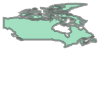

In [48]:
world.iloc[3].loc["geometry"]

In [49]:
world = world[["POP_EST", "CONTINENT", "ISO_A3", "GDP_MD", "geometry"]]

In [50]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

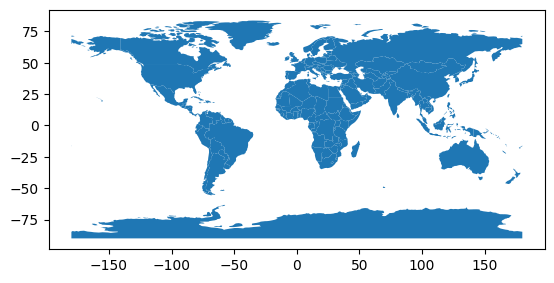

In [51]:
world.plot()

In [52]:
world.dissolve(by="CONTINENT")

,geometry,POP_EST,ISO_A3,GDP_MD
CONTINENT,,,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",58005463.0,TZA,63177
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",4490.0,ATA,898
Asia,"MULTIPOLYGON (((48.67923 14.0032, 48.23895 13....",18513930.0,KAZ,181665
Europe,"MULTIPOLYGON (((-53.55484 2.3349, -53.77852 2....",144373535.0,RUS,1699876
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",37589262.0,CAN,1736425
Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456...",889953.0,FJI,5496
Seven seas (open ocean),"POLYGON ((68.935 -48.625, 69.58 -48.94, 70.525...",140.0,ATF,16
South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.2321 ...",44938712.0,ARG,445445


Text(35.597222222222214, 0.5, 'longitude (degrees)')

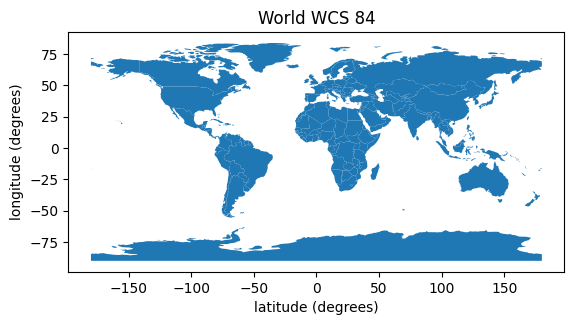

In [53]:
ax = world.plot()
ax.set_title("World WCS 84")
ax.set_xlabel("latitude (degrees)")
ax.set_ylabel("longitude (degrees)")

<Axes: >

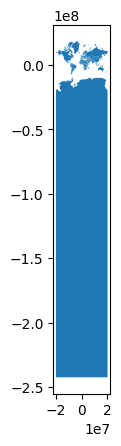

In [54]:
world.to_crs("EPSG:3395").plot()

In [55]:
world = gpd.read_file(url)

In [61]:
world_nopoles = world[(world.NAME != "Antarctica") & (world.NAME != "Fr. S. Antarctic Lands")]

world_nopoles = world_nopoles.to_crs("EPSG:3395")

ax = world_nopoles.plot()

#ax.set_title()
#ax.set_xlabel()
#ax.set_ylabel()

AttributeError: 'GeoDataFrame' object has no attribute 'NAME'

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1750: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1750: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


Text(0.5, 1.0, 'China, HK Projection...')

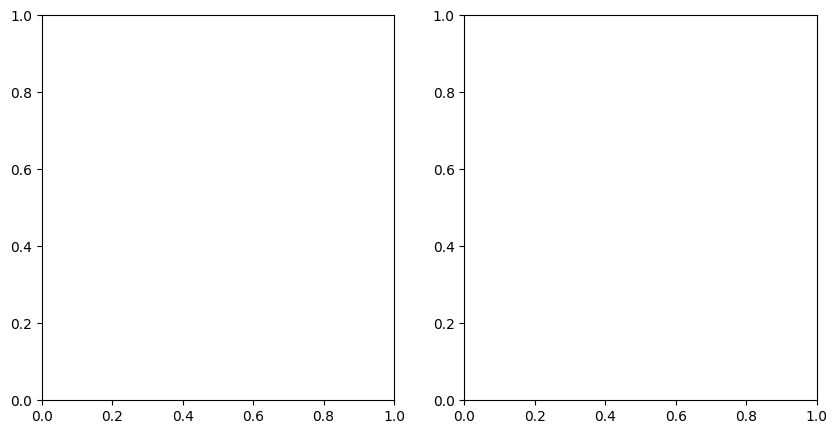

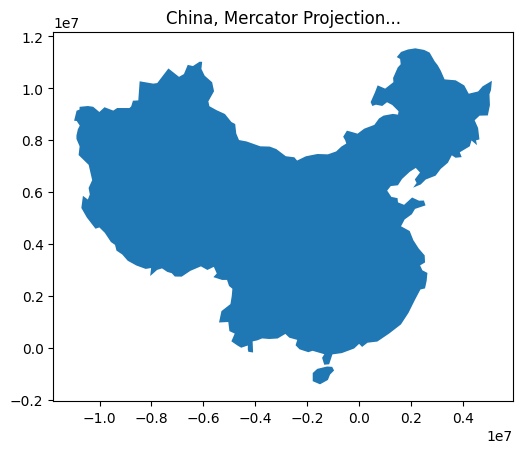

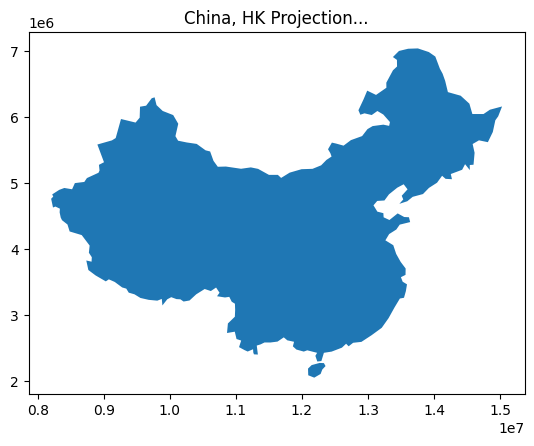

In [57]:
import pylab as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax = world_nopoles[world.NAME == "China"].to_crs("EPSG:3407").plot()
ax.set_title("China, Mercator Projection...")
ax = fig.add_subplot(1,2,2)
ax = world_nopoles[world.NAME == "China"].to_crs("EPSG:3395").plot()
ax.set_title("China, HK Projection...")

In [58]:
world_nopoles[world.NAME == "China"].to_crs("EPSG:3395").crs

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1750: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

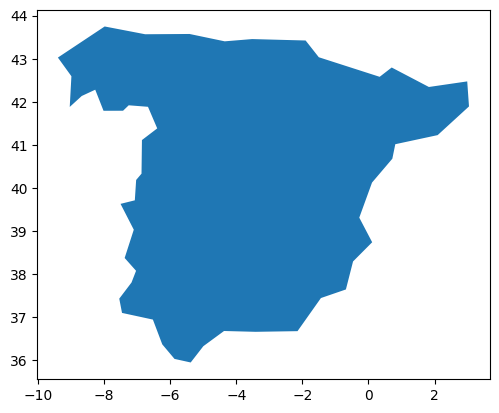

In [59]:
world[world.NAME == "Spain"].plot()

In [60]:
world.set_index("NAME", inplace=True)
type(world.loc["Spain", "geometry"])

shapely.geometry.polygon.Polygon

In [67]:
url = "https://www2.census.gov/geo/tiger/TIGER2024/UAC20/tl_2024_us_uac20.zip"

In [68]:
cities = gpd.read_file(url)

In [69]:
cities

,UACE20,GEOID20,GEOIDFQ20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,14482,14482,400C200US14482,"Casper, WY","Casper, WY Urban Area",67,G3500,S,72213481,859632,+42.8391477,-106.3367071,"MULTIPOLYGON (((-106.27308 42.8288, -106.27308..."
1,81604,81604,400C200US81604,"Sheridan, WY","Sheridan, WY Urban Area",67,G3500,S,33638046,49823,+44.7865750,-106.9619773,"MULTIPOLYGON (((-106.95562 44.82931, -106.9554..."
2,18397,18397,400C200US18397,"Cody, WY","Cody, WY Urban Area",67,G3500,S,17893069,29888,+44.5246958,-109.0502125,"MULTIPOLYGON (((-109.05647 44.51664, -109.0569..."
3,89488,89488,400C200US89488,"Union, SC","Union, SC Urban Area",67,G3500,S,23763897,8766,+34.7247912,-081.6262933,"MULTIPOLYGON (((-81.59001 34.71101, -81.59056 ..."
4,01684,01684,400C200US01684,"Alpena, MI","Alpena, MI Urban Area",67,G3500,S,32911444,1992202,+45.0495900,-083.4535730,"MULTIPOLYGON (((-83.40797 45.06554, -83.40832 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,34273,34273,400C200US34273,"Grand Junction, CO","Grand Junction, CO Urban Area",67,G3500,S,195837116,3556414,+39.0890618,-108.5674520,"MULTIPOLYGON (((-108.42236 39.10622, -108.4208..."
2640,78094,78094,400C200US78094,"Salem, IL","Salem, IL Urban Area",67,G3500,S,12683024,167909,+38.6257591,-088.9548021,"POLYGON ((-88.93604 38.64526, -88.93595 38.645..."
2641,91027,91027,400C200US91027,"Waco, TX","Waco, TX Urban Area",67,G3500,S,232663051,1417906,+31.5415622,-097.1640133,"MULTIPOLYGON (((-97.0998 31.54163, -97.09979 3..."
2642,04033,04033,400C200US04033,"Auburn, AL","Auburn, AL Urban Area",67,G3500,S,158407525,1469728,+32.6113816,-085.4521355,"MULTIPOLYGON (((-85.43021 32.66315, -85.42986 ..."


<Axes: >

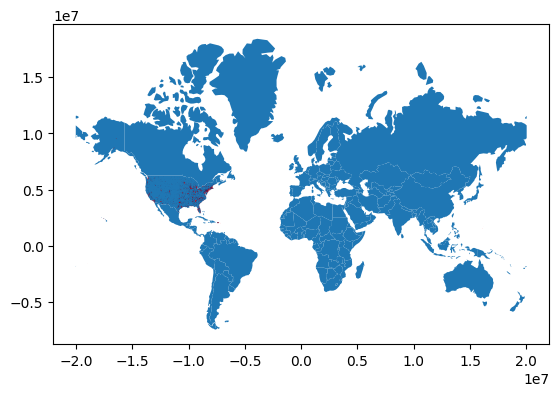

In [72]:
ax = world_nopoles.plot()
cities.to_crs(world_nopoles.crs).plot(ax=ax, color="red")